In [1]:
from collections import Counter
import pandas as pd

from getHighCorr import getHighCorr, getLowCorr
from plotColumns import plotColumns

##### See which of the funds are highly correlated

In [2]:
def showCorr(corr):
    l = []
    for a, b in corr:
        f1, f2 = a
        l.append(f1)
        l.append(f2)
    return l

In [3]:
# Get the total return for sum of funds
def getTotalReturn(df):
    lag = pd.DataFrame()
    for col in df.columns:
        lag[col] = df[col].pct_change()+1
    yearlyReturn = lag.mean(axis=1)
    yearlyReturn = yearlyReturn.cumprod().dropna()
    init = yearlyReturn.iloc[0]
    final = yearlyReturn.iloc[-1]
    numYears = len(yearlyReturn)/12
    return (final/init)**(1/numYears)

In [4]:
acct = 'IRA'

In [5]:
dataLoc = '/home/tbrownex/data/retirement/funds/'
df = pd.read_csv(dataLoc+'merged_'+acct+'.csv')
dataLoc = '/home/tbrownex/data/retirement/benchmark/'
spx = pd.read_csv(dataLoc+'spxTotals.csv')

##### Add SPX to the account as a column

In [6]:
df.set_index('date', inplace=True)
spx.set_index('date', inplace=True)
df.sort_index(inplace=True)

df = df.join(spx)

In [24]:
#print(getTotalReturn(df))

##### Which funds are highly correlated with SPX?

In [25]:
# 5 funds are very highly correlated with SPX
spxCorr = df.corr().loc['SPX']
print(spxCorr[spxCorr>0.95])

# Keep the one with the highest return (TRBCX) and remove the others
#SPXdups = ['PRILX', 'VFIAX', 'IJH', 'IJR']
#df.drop(columns=SPXdups, inplace=True)

IJH      0.966900
VFIAX    0.999990
TRBCX    0.986208
IJR      0.963364
PRILX    0.971752
SPX      1.000000
Name: SPX, dtype: float64


##### Which funds are highly anti-correlated with SPX?

In [7]:
# 6 funds are negative or loosely correlated with SPX
spxCorr = df.corr().loc['SPX']
spxCorr[spxCorr<0.4]

PHYTX   -0.359665
PCLPX   -0.812398
PZTRX   -0.248819
VAIPX    0.392855
GSDIX    0.349208
SKIRX   -0.481669
Name: SPX, dtype: float64

##### Are any of them positive in a bear market? (Bear market defined as 15% loss over a year)


In [8]:
corrFactor = 0.4
bearMarketLoss = -0.15
numPeriods = 12

df['shifted'] = df['SPX'].shift(periods=numPeriods)
df['SPX-return'] = (df['SPX']-df['shifted'])/df['shifted']

bearMarkets = df[df['SPX-return'] < bearMarketLoss].index.to_list()

In [19]:
for fund in spxCorr[spxCorr < corrFactor].index:
    df['shifted'] = df[fund].shift(periods=numPeriods)
    df['return'] = (df[fund]-df['shifted'])/df['shifted']
    tom=df[df.index.isin(bearMarkets)]['return'].mean()
    print(fund, tom)

PHYTX -0.1429114479871846
PCLPX nan
PZTRX -0.035907920578268436
VAIPX -0.06665998248099804
GSDIX -0.1767231945779326
SKIRX -0.6882124639540678


##### Any other highly correlated funds?

In [20]:
highCorr = getHighCorr(df, 0.95)
highCorr

[(('VEA', 'EFA'), 0.9941151569105641),
 (('TRBCX', 'SPX'), 0.9862003467177678),
 (('PIREX', 'POSIX'), 0.961794129025217),
 (('PCLPX', 'SKIRX'), 0.9609198615383603),
 (('NFFFX', 'COVRX'), 0.9514252386155084)]

In [33]:
# VEA and EFA
# VEA is a superset of EFA so no right/wrong choice on which to choose but VEA is performing a little better
df.drop(columns='EFA', inplace=True)

In [34]:
# PIREX and POSIX
# both real estate; PIREX US and POSIX Global
# Odd that they are so highly correlated
# Not sure which one to pick; PIREX for now
df.drop(columns='POSIX', inplace=True)

In [35]:
# PCLPX and SKIRX: both are commodities and both are negative returns
# Maybe keep one as a defensive but small exposure
df.drop(columns='SKIRX', inplace=True)

In [ ]:
# NFFFX and COVRX
# Not sure why these are correlated; seem to have different holding so maybe spurious

In [40]:
highCorr = getHighCorr(df, 0.90)
highCorr

[(('TRBCX', 'SPX'), 0.9862003467177678),
 (('NFFFX', 'COVRX'), 0.9514252386155084),
 (('MEIIX', 'SPX'), 0.941599549749736),
 (('TRBCX', 'COVRX'), 0.9348358774820119),
 (('COVRX', 'SPX'), 0.9202703541243694),
 (('MEIIX', 'TRBCX'), 0.9185150385895358),
 (('VEA', 'NFFFX'), 0.9175173188226077),
 (('COIIX', 'MEIIX'), 0.9131380301020602),
 (('COIIX', 'NFFFX'), 0.911538940879544),
 (('COIIX', 'VEA'), 0.9041744385584278),
 (('NFFFX', 'SPX'), 0.9000688184649612)]

In [59]:
lowCorr

[(('VAIPX', 'SPX'), 0.3928550288594566),
 (('PHYTX', 'MEIIX'), 0.38724738893342425),
 (('PZTRX', 'GSDIX'), 0.3837331173641449),
 (('PCLPX', 'PZTRX'), 0.37392193238859156),
 (('VEA', 'GSDIX'), 0.3709225252237525),
 (('PZTRX', 'COVRX'), 0.35971933499479003),
 (('PHYTX', 'SPX'), 0.3596645185981633),
 (('PHYTX', 'VEA'), 0.35407338073873823),
 (('MEIIX', 'VAIPX'), 0.35257436182541596),
 (('ANAYX', 'COVRX'), 0.35174097213249517),
 (('GSDIX', 'SPX'), 0.34920795855897996),
 (('PHYTX', 'PONPX'), 0.34526775131155857),
 (('TRBCX', 'GSDIX'), 0.31445218289830396),
 (('COIIX', 'PZTRX'), 0.2943846150479191),
 (('COIIX', 'VAIPX'), 0.2693650565171255),
 (('ANAYX', 'MTIIX'), 0.26193850938380886),
 (('PZTRX', 'SPX'), 0.2488193375227278),
 (('PONPX', 'COVRX'), 0.23907021527150188),
 (('PZTRX', 'TRBCX'), 0.23884765797958313),
 (('PCLPX', 'VAIPX'), 0.2377896483286121),
 (('MTIIX', 'COVRX'), 0.23471994256828754),
 (('VAIPX', 'PIREX'), 0.21679306219584),
 (('PHYTX', 'GSDIX'), 0.20356352614205095),
 (('PHYTX',

In [58]:
sorted(Counter(corrSummary).items(), key=lambda x: x[1], reverse=True)

[('PHYTX', 11),
 ('VAIPX', 8),
 ('PZTRX', 8),
 ('GSDIX', 7),
 ('COVRX', 6),
 ('MTIIX', 6),
 ('SPX', 4),
 ('PCLPX', 4),
 ('VEA', 3),
 ('ANAYX', 3),
 ('PONPX', 3),
 ('COIIX', 3),
 ('PIREX', 3),
 ('MEIIX', 2),
 ('TRBCX', 2),
 ('NFFFX', 1)]

In [49]:
for x in Counter(corrSummary):
    print(x)

VAIPX
SPX
PHYTX
MEIIX
PZTRX
GSDIX
PCLPX
VEA
COVRX
ANAYX
PONPX
TRBCX
COIIX
MTIIX
PIREX
NFFFX


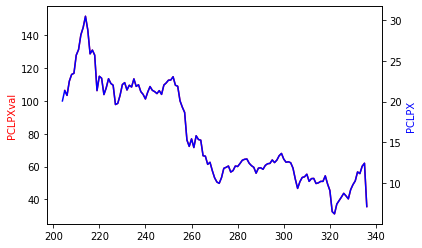

In [57]:
colA = 'PCLPXval'
colB = 'PCLPX'
plotColumns(df[colA], df[colB], 'PCLPXval', 'PCLPX')

In [12]:
corrDF = df.corr()

In [30]:
for col in corrDF.columns:
    if corrDF[col]<0.5:
        print(col, idx)

ANAYXval    1.000000
PHYTXval    0.484475
PCLPXval   -0.017372
IJHval      0.529129
COIIXval    0.572264
MEIIXval    0.552919
PZTRXval    0.654643
VEAval      0.534861
VFIAXval    0.484065
TRBCXval    0.453121
EFAval      0.526942
VAIPXval    0.778646
IJRval      0.489915
PIREXval    0.723747
NFFFXval    0.626748
PRILXval    0.574530
POSIXval    0.734902
GSDIXval    0.894240
MTIIXval    0.261926
SKIRXval   -0.300428
PONPXval    0.831689
COVRXval    0.351749
total       0.586591
Name: ANAYXval, dtype: float64
ANAYXval    0.484475
PHYTXval    1.000000
PCLPXval    0.891473
IJHval     -0.356751
COIIXval    0.104132
MEIIXval   -0.387247
PZTRXval    0.513338
VEAval      0.354074
VFIAXval   -0.336950
TRBCXval   -0.427212
EFAval      0.345928
VAIPXval   -0.158712
IJRval     -0.353450
PIREXval    0.158522
NFFFXval    0.139960
PRILXval   -0.328068
POSIXval    0.083816
GSDIXval    0.203565
MTIIXval   -0.174346
SKIRXval    0.651377
PONPXval    0.345263
COVRXval   -0.197568
total      -0.504091
Nam

In [17]:
d = {}
for col in corrDF.columns:
    lowCorr = corrDF[col] < 0.5
    for idx, cov in lowCorr.items():
        d[(col, idx)] = corrDF[col][idx]

In [18]:
d

{('ANAYXval', 'ANAYXval'): 1.0,
 ('ANAYXval', 'PHYTXval'): 0.4844746106223357,
 ('ANAYXval', 'PCLPXval'): -0.017371574105286867,
 ('ANAYXval', 'IJHval'): 0.5291286749482215,
 ('ANAYXval', 'COIIXval'): 0.5722639233962279,
 ('ANAYXval', 'MEIIXval'): 0.5529191108941451,
 ('ANAYXval', 'PZTRXval'): 0.6546426167620596,
 ('ANAYXval', 'VEAval'): 0.5348614414730929,
 ('ANAYXval', 'VFIAXval'): 0.4840652995386014,
 ('ANAYXval', 'TRBCXval'): 0.4531207950378372,
 ('ANAYXval', 'EFAval'): 0.526942456302023,
 ('ANAYXval', 'VAIPXval'): 0.7786463536620046,
 ('ANAYXval', 'IJRval'): 0.48991507324092587,
 ('ANAYXval', 'PIREXval'): 0.7237466253659315,
 ('ANAYXval', 'NFFFXval'): 0.6267480552315421,
 ('ANAYXval', 'PRILXval'): 0.5745295864903759,
 ('ANAYXval', 'POSIXval'): 0.7349019723504134,
 ('ANAYXval', 'GSDIXval'): 0.894240381269404,
 ('ANAYXval', 'MTIIXval'): 0.26192562038076594,
 ('ANAYXval', 'SKIRXval'): -0.3004283557917957,
 ('ANAYXval', 'PONPXval'): 0.8316891574170358,
 ('ANAYXval', 'COVRXval'): 0.351

In [19]:
df.corr()

,ANAYXval,PHYTXval,PCLPXval,IJHval,COIIXval,MEIIXval,PZTRXval,VEAval,VFIAXval,TRBCXval,...,PIREXval,NFFFXval,PRILXval,POSIXval,GSDIXval,MTIIXval,SKIRXval,PONPXval,COVRXval,total
ANAYXval,1.000000,0.484475,-0.017372,0.529129,0.572264,0.552919,0.654643,0.534861,0.484065,0.453121,...,0.723747,0.626748,0.574530,0.734902,0.894240,0.261926,-0.300428,0.831689,0.351749,0.586591
PHYTXval,0.484475,1.000000,0.891473,-0.356751,0.104132,-0.387247,0.513338,0.354074,-0.336950,-0.427212,...,0.158522,0.139960,-0.328068,0.083816,0.203565,-0.174346,0.651377,0.345263,-0.197568,-0.504091
PCLPXval,-0.017372,0.891473,1.000000,-0.788854,-0.547638,-0.805798,0.373924,-0.418072,-0.812496,-0.786585,...,-0.794917,-0.468058,-0.789316,-0.679834,0.423308,-0.471727,0.960919,-0.150843,-0.434650,-0.768523
IJHval,0.529129,-0.356751,-0.788854,1.000000,0.880075,0.980778,-0.153998,0.677824,0.972617,0.953648,...,0.772656,0.894780,0.985234,0.871392,0.445843,0.629153,-0.568035,0.663054,0.873636,0.978721
COIIXval,0.572264,0.104132,-0.547638,0.880075,1.000000,0.913138,0.294385,0.904173,0.857061,0.816304,...,0.828323,0.911539,0.882379,0.873623,0.414647,0.715178,-0.155748,0.732192,0.790361,0.881253
MEIIXval,0.552919,-0.387247,-0.805798,0.980778,0.913138,1.000000,-0.404003,0.735169,0.964495,0.918515,...,0.841123,0.863561,0.976536,0.908668,0.451540,0.736096,-0.446814,0.710850,0.850468,0.959883
PZTRXval,0.654643,0.513338,0.373924,-0.153998,0.294385,-0.404003,1.000000,0.404795,-0.086768,-0.238848,...,-0.104744,0.460508,0.164559,0.315416,0.383736,0.055565,-0.056393,0.407862,0.359719,-0.456400
VEAval,0.534861,0.354074,-0.418072,0.677824,0.904173,0.735169,0.404795,1.000000,0.671972,0.619194,...,0.701878,0.917517,0.669732,0.818213,0.370924,0.652091,0.207436,0.670147,0.770588,0.676628
VFIAXval,0.484065,-0.336950,-0.812496,0.972617,0.857061,0.964495,-0.086768,0.671972,1.000000,0.991260,...,0.757534,0.899991,0.971739,0.819976,0.348770,0.555260,-0.482092,0.562598,0.920181,0.933744
TRBCXval,0.453121,-0.427212,-0.786585,0.953648,0.816304,0.918515,-0.238848,0.619194,0.991260,1.000000,...,0.700879,0.899935,0.953251,0.757476,0.314449,0.480878,-0.524283,0.501065,0.934836,0.902959


In [11]:
df.corr()

,ANAYXval,PHYTXval,PCLPXval,IJHval,COIIXval,MEIIXval,PZTRXval,VEAval,VFIAXval,TRBCXval,...,PIREXval,NFFFXval,PRILXval,POSIXval,GSDIXval,MTIIXval,SKIRXval,PONPXval,COVRXval,total
ANAYXval,1.000000,0.484475,-0.017372,0.529129,0.572264,0.552919,0.654643,0.534861,0.484065,0.453121,...,0.723747,0.626748,0.574530,0.734902,0.894240,0.261926,-0.300428,0.831689,0.351749,0.586591
PHYTXval,0.484475,1.000000,0.891473,-0.356751,0.104132,-0.387247,0.513338,0.354074,-0.336950,-0.427212,...,0.158522,0.139960,-0.328068,0.083816,0.203565,-0.174346,0.651377,0.345263,-0.197568,-0.504091
PCLPXval,-0.017372,0.891473,1.000000,-0.788854,-0.547638,-0.805798,0.373924,-0.418072,-0.812496,-0.786585,...,-0.794917,-0.468058,-0.789316,-0.679834,0.423308,-0.471727,0.960919,-0.150843,-0.434650,-0.768523
IJHval,0.529129,-0.356751,-0.788854,1.000000,0.880075,0.980778,-0.153998,0.677824,0.972617,0.953648,...,0.772656,0.894780,0.985234,0.871392,0.445843,0.629153,-0.568035,0.663054,0.873636,0.978721
COIIXval,0.572264,0.104132,-0.547638,0.880075,1.000000,0.913138,0.294385,0.904173,0.857061,0.816304,...,0.828323,0.911539,0.882379,0.873623,0.414647,0.715178,-0.155748,0.732192,0.790361,0.881253
MEIIXval,0.552919,-0.387247,-0.805798,0.980778,0.913138,1.000000,-0.404003,0.735169,0.964495,0.918515,...,0.841123,0.863561,0.976536,0.908668,0.451540,0.736096,-0.446814,0.710850,0.850468,0.959883
PZTRXval,0.654643,0.513338,0.373924,-0.153998,0.294385,-0.404003,1.000000,0.404795,-0.086768,-0.238848,...,-0.104744,0.460508,0.164559,0.315416,0.383736,0.055565,-0.056393,0.407862,0.359719,-0.456400
VEAval,0.534861,0.354074,-0.418072,0.677824,0.904173,0.735169,0.404795,1.000000,0.671972,0.619194,...,0.701878,0.917517,0.669732,0.818213,0.370924,0.652091,0.207436,0.670147,0.770588,0.676628
VFIAXval,0.484065,-0.336950,-0.812496,0.972617,0.857061,0.964495,-0.086768,0.671972,1.000000,0.991260,...,0.757534,0.899991,0.971739,0.819976,0.348770,0.555260,-0.482092,0.562598,0.920181,0.933744
TRBCXval,0.453121,-0.427212,-0.786585,0.953648,0.816304,0.918515,-0.238848,0.619194,0.991260,1.000000,...,0.700879,0.899935,0.953251,0.757476,0.314449,0.480878,-0.524283,0.501065,0.934836,0.902959
